In [43]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statistics
import math

In [44]:
import seaborn as sns
sns.set(font_scale=1.5)

## Пример 1. Различение гипотез о среднем нормальной совокупности.

In [45]:
n = 500
a = 0.2
sigma = 1
alpha = 0.01

norm_rv1 = sps.norm(loc=a, scale=sigma**2)
norm_rv0 = sps.norm(loc=0, scale=sigma**2)
sample1 = norm_rv1.rvs(size=n)
sample0 = norm_rv0.rvs(size=n)

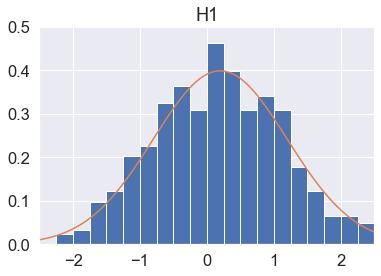

In [46]:
plt.axis([-2.5, 2.5, 0, 0.5])
plt.hist(sample1, bins=20, range=(-2.5, 2.5), density=True)
x = np.linspace(-2.5, 2.5, 100)
plt.title('H1')
plt.plot(x, norm_rv1.pdf(x))

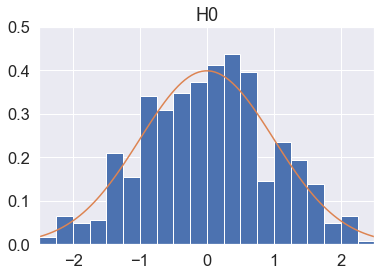

In [47]:
plt.axis([-2.5, 2.5, 0, 0.5])
plt.hist(sample0, bins=20, range=(-2.5, 2.5), density=True)
x = np.linspace(-2.5, 2.5, 100)
plt.title('H0')
plt.plot(x, norm_rv0.pdf(x))

In [48]:
# Находим h2, если верна H0
Q = sps.norm(0, 1).ppf(1-alpha)
h2 = sigma * np.sqrt(n) * Q
print(np.round(h2,2))
if sample1.sum() > h2:
    print('Гипотеза H1 принимается')
else:
    print('Гипотеза H1 отклоняется')

52.02
Гипотеза H1 принимается


In [49]:
print('Сумма наблюдений для выборки в соответствии с гипотезой H1 = {:.2f}'.format(sample1.sum()))
print('Сумма наблюдений для выборки в соответствии с гипотезой H0 = {:.2f}'.format(sample0.sum()))
print('Значение порога h2 =', 52)

Сумма наблюдений для выборки в соответствии с гипотезой H1 = 89.35
Сумма наблюдений для выборки в соответствии с гипотезой H0 = 13.52
Значение порога h2 = 52


In [50]:
# определим вероятность ошибки второго рода
beta = sps.norm(0,1).cdf(Q - (a/sigma)*np.sqrt(n))
print(np.round(beta, 3))

0.016


## Задача 2

In [51]:
lambA = 0.12
lambB = 0.15

pois_rv_A = sps.poisson(mu=lambA)
pois_rv_B = sps.poisson(mu=lambB)
sample_A = pois_rv_A.rvs(size=2889)
sample_B = pois_rv_B.rvs(size=2889)

print('Сумма наблюдений для выборки в соответствии с гипотезой H1 = {:.2f}'.format(sample_A.sum()))
print('Сумма наблюдений для выборки в соответствии с гипотезой H0 = {:.2f}'.format(sample_B.sum()))
print('Значение порога h2 =', 385)

Сумма наблюдений для выборки в соответствии с гипотезой H1 = 341.00
Сумма наблюдений для выборки в соответствии с гипотезой H0 = 443.00
Значение порога h2 = 385


In [52]:
a = lambda n: 0.14*n-20.8
b = lambda n: 0.14*n+17.8

def modeling(lamb):   
    pois_rv = sps.poisson(mu=lamb)
    sum = 0
    xs = np.array([])
    i = 0
    while sum > a(i) and sum < b(i):
        x = pois_rv.rvs(size=1)
        sum += x
        xs = np.append(xs, sum)
        i += 1
    return xs, i

1222


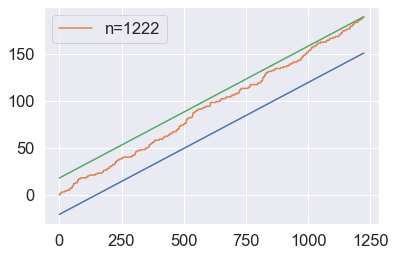

In [122]:
xs, n = modeling(lambB)
x = np.linspace(0, n+1, n)
print(n)
plt.plot(x, a(x))
plt.plot(x, xs, label='n={:d}'.format(n))
plt.plot(x, b(x))
plt.legend()

1185


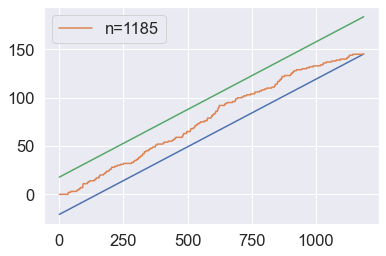

In [65]:
xs, n = modeling(lambA)
x = np.linspace(0, n+1, n)
print(n)
plt.plot(x, a(x))
plt.plot(x, xs, label='n={:d}'.format(n))
plt.plot(x, b(x))
plt.legend()